# Visualizing different course popularity and price in Udemy

In [1]:
import pandas as pd
import numpy as np

In [2]:
udemy_data = pd.read_csv("udemy-courses/udemy_courses.csv")
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Before we step into
visualizations let us conduct data wrangling to remove unwanted data and handle missing data, if any

In [3]:
#remove url
udemy_data.drop(['url'],axis=1,inplace=True)
udemy_data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
#examine the data type of columns
udemy_data.dtypes

course_id                int64
course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [5]:
#examine the missing data
missing_data = udemy_data.isnull()
missing_data.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#find the number of missing values in each column
for c in missing_data.columns.values.tolist():
    print(c)
    print(missing_data[c].value_counts())
    print("")

course_id
False    3678
Name: course_id, dtype: int64

course_title
False    3678
Name: course_title, dtype: int64

is_paid
False    3678
Name: is_paid, dtype: int64

price
False    3678
Name: price, dtype: int64

num_subscribers
False    3678
Name: num_subscribers, dtype: int64

num_reviews
False    3678
Name: num_reviews, dtype: int64

num_lectures
False    3678
Name: num_lectures, dtype: int64

level
False    3678
Name: level, dtype: int64

content_duration
False    3678
Name: content_duration, dtype: int64

published_timestamp
False    3678
Name: published_timestamp, dtype: int64

subject
False    3678
Name: subject, dtype: int64



There is no mising data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

[Text(0, 0, 'Business Finance'),
 Text(0, 0, 'Graphic Design'),
 Text(0, 0, 'Musical Instruments'),
 Text(0, 0, 'Web Development')]

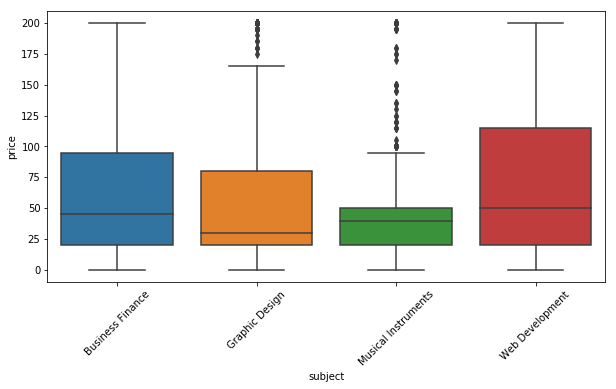

In [8]:
#let us examine the relationship between price and subject
plt.figure(figsize=(10,5))
box=sns.boxplot(x="subject", y="price", data=udemy_data)
box.set_xticklabels(box.get_xticklabels(),rotation=45)

[Text(0, 0, 'All Levels'),
 Text(0, 0, 'Intermediate Level'),
 Text(0, 0, 'Beginner Level'),
 Text(0, 0, 'Expert Level')]

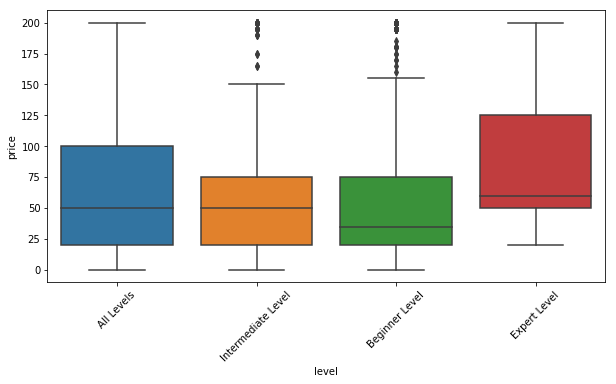

In [9]:
#let us examine the relationship between price and level
plt.figure(figsize=(10,5))
box=sns.boxplot(x="level", y="price", data=udemy_data)
box.set_xticklabels(box.get_xticklabels(),rotation=45)

We see that diferent subject prices have significant overlap, therefore subject may not be a good price predictor. Same with level too

Now let's first take a look at the variables by utilizing a description method.

In [10]:
udemy_data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


We observe that some courses do not have lectures, let us examine such courses

In [11]:
#let us find the course with zero number of lectures
zero_lectures = udemy_data['num_lectures']==0
result = udemy_data.loc[zero_lectures]
result

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,True,20,0,0,0,All Levels,0.0,2015-12-17T05:38:38Z,Business Finance


Since this course has no lectures and subscribers, yet it costs $20. This seems ambiguos, so we can remove this row.

# Analyzing relationship between price,subject and level through heatmaps

In [12]:
udemy_data.drop(index=892,inplace=True)

In [13]:
df_group_one = udemy_data[['level','subject','price']]

In [14]:
df_group_one = df_group_one.groupby(['level'],as_index=False).mean()
df_group_one

,level,price
0,All Levels,73.049793
1,Beginner Level,55.681102
2,Expert Level,91.120690
3,Intermediate Level,61.923990


We can observe that Web Development course is quite expensive than other courses

In [15]:
udemy_data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [16]:
df_group_one = udemy_data[['level','subject','price']]
df_group_two = df_group_one.groupby(['level','subject'],as_index=False).mean()
df_group_two

,level,subject,price
0,All Levels,Business Finance,75.280576
1,All Levels,Graphic Design,62.701342
2,All Levels,Musical Instruments,55.978261
3,All Levels,Web Development,82.526555
4,Beginner Level,Business Finance,53.382353
5,Beginner Level,Graphic Design,53.477366
6,Beginner Level,Musical Instruments,43.378378
7,Beginner Level,Web Development,68.363171
8,Expert Level,Business Finance,95.967742
9,Expert Level,Graphic Design,70.000000


Let us analyse this grouped data with a pivot table followed by a heat map

In [17]:
grouped_pivot = df_group_two.pivot(index='subject',columns='level')
grouped_pivot

price                                               
level               All Levels Beginner Level Expert Level Intermediate Level
subject                                                                      
Business Finance     75.280576      53.382353    95.967742          66.054688
Graphic Design       62.701342      53.477366    70.000000          49.824561
Musical Instruments  55.978261      43.378378    36.428571          51.039604
Web Development      82.526555      68.363171   113.666667          71.259259

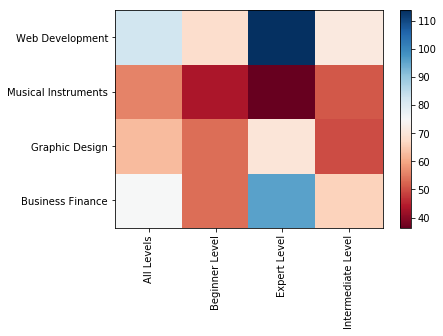

In [18]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The above heat map shows how price is related to 'subject' and 'level'

# Analyzing course duration distribution across different subject types

In [26]:
import plotly.express as px
fig = px.box(udemy_data,
       x='content_duration',
       y='subject',
       orientation='h',
       color='is_paid',
       color_discrete_sequence=['#FF5733','#3398FF'],
      )

fig.update_layout(title_text='Duration Distribution Across Subject and Type of Course',title_x=0.5)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Course Subject')
fig.show()

We can observe that paid courses have greater content duration comapred to unpaid courses.

# Visualization of the most Popular courses based on Number of subscribers.

In [20]:
df_group = udemy_data[['subject','num_subscribers','level']]
df_group_by = df_group.groupby(['subject','level'],as_index=False).count()
df_group_by

,subject,level,num_subscribers
0,Business Finance,All Levels,695
1,Business Finance,Beginner Level,340
2,Business Finance,Expert Level,31
3,Business Finance,Intermediate Level,128
4,Graphic Design,All Levels,298
5,Graphic Design,Beginner Level,243
6,Graphic Design,Expert Level,5
7,Graphic Design,Intermediate Level,57
8,Musical Instruments,All Levels,276
9,Musical Instruments,Beginner Level,296


So we can see that Web Developemnt has the maximum number of subscribers..now let us see the top 10 courses

In [21]:
top_10 = udemy_data.sort_values('num_subscribers',ascending=False)[0:10].sort_values('num_subscribers',ascending=True).reset_index(drop=True).reset_index()
top_10
fig = px.bar(top_10, x='num_subscribers', y='index',
             hover_data=['course_title'], color='num_subscribers', 
             orientation = 'h',
             height = 700
    )
fig.update_layout(title_text='Top 10 popular courses',title_x=0.5)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

# Visualizing the popularity of courses at different levels

In [22]:
df = udemy_data[['subject','num_subscribers','level']]
fig = px.bar(df, x="subject", y="num_subscribers", color='level')
fig.show()

From the above data we can see that Web developemnt yet again has more number of subcribers in each of the different levels
compared to other subjects and Musical instruments has the least number of subscribers

# Is there any Correlaeation between Price, reviewers and subscribers?

In [23]:
#let us see if there is any correlation between price and subscribers
udemy_data.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013667,0.142302,-0.167872,-0.058557,-0.024679,-0.057253
is_paid,-0.013667,1.000000,0.328605,-0.266139,-0.087459,0.112651,0.094480
price,0.142302,0.328605,1.000000,0.050705,0.113671,0.330051,0.293352
num_subscribers,-0.167872,-0.266139,0.050705,1.000000,0.649943,0.157689,0.161789
num_reviews,-0.058557,-0.087459,0.113671,0.649943,1.000000,0.243015,0.228874
num_lectures,-0.024679,0.112651,0.330051,0.157689,0.243015,1.000000,0.801620
content_duration,-0.057253,0.094480,0.293352,0.161789,0.228874,0.801620,1.000000


In [24]:
udemy_data[['price','num_lectures']].corr()

,price,num_lectures
price,1.000000,0.330051
num_lectures,0.330051,1.000000


(0, 345.13864947752745)

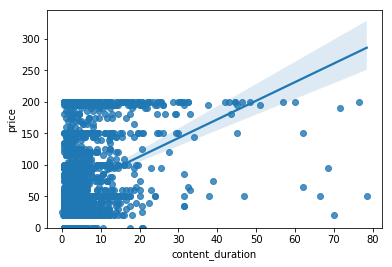

In [25]:
sns.regplot(x="content_duration", y="price", data=udemy_data)
plt.ylim(0,)

We observe that from the given independent variables such as num_reviews,num_subscribers etc do not have a linear correlation
with price , hence we cannot build a linear regression model to this data i,e the above variables are not good predictors of price